In [ ]:
import numpy as np
from sklearn.decomposition import NMF

# 1. 準備數據 (必須是非負的)
# 假設這是 5 個樣本，每個樣本有 6 個特徵
V = np.array([
    [5, 3, 0, 1, 0, 0],
    [4, 2, 0, 1, 0, 0],
    [0, 0, 4, 5, 1, 0],
    [0, 0, 5, 4, 0, 1],
    [0, 1, 0, 0, 5, 4]
])

print("原始矩陣 V (形狀: {}):".format(V.shape))
print(V)
print("-" * 30)

# 2. 設定 NMF 模型
# n_components=2 代表我們想將數據壓縮成 2 個主要特徵 (Rank=2)
# init='random' 初始化方法
model = NMF(n_components=2, init='random', random_state=42, max_iter=1000)

# 3. 擬合模型並進行分解
W = model.fit_transform(V)  # 基底矩陣 (樣本 x 潛在特徵)
H = model.components_       # 係數矩陣 (潛在特徵 x 原始特徵)

# 4. 輸出結果
print("基底矩陣 W (形狀: {}):".format(W.shape))
print(np.round(W, 2))
print("\n係數矩陣 H (形狀: {}):".format(H.shape))
print(np.round(H, 2))

print("-" * 30)

# 5. 驗證重建結果 (V ≈ W x H)
V_reconstructed = np.dot(W, H)
print("重建矩陣 WH (近似 V):")
print(np.round(V_reconstructed, 2))

原始矩陣 V (形狀: (5, 6)):
[[5 3 0 1 0 0]
 [4 2 0 1 0 0]
 [0 0 4 5 1 0]
 [0 0 5 4 0 1]
 [0 1 0 0 5 4]]
------------------------------
基底矩陣 W (形狀: (5, 2)):
[[0.   2.8 ]
 [0.03 2.16]
 [3.54 0.02]
 [3.54 0.  ]
 [0.57 0.56]]

係數矩陣 H (形狀: (2, 6)):
[[0.   0.01 1.26 1.25 0.25 0.23]
 [1.76 1.03 0.   0.35 0.21 0.17]]
------------------------------
重建矩陣 WH (近似 V):
[[4.95 2.9  0.   0.98 0.59 0.47]
 [3.81 2.24 0.04 0.8  0.46 0.37]
 [0.03 0.04 4.44 4.43 0.88 0.8 ]
 [0.   0.02 4.44 4.42 0.88 0.8 ]
 [0.99 0.58 0.72 0.91 0.26 0.22]]


正在載入臉部數據集...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
數據集包含 400 張圖片，每張圖片有 4096 個像素特徵。
數據範圍: 0.0 ~ 1.0

正在執行 PCA (Eigenfaces)...
正在執行 NMF...


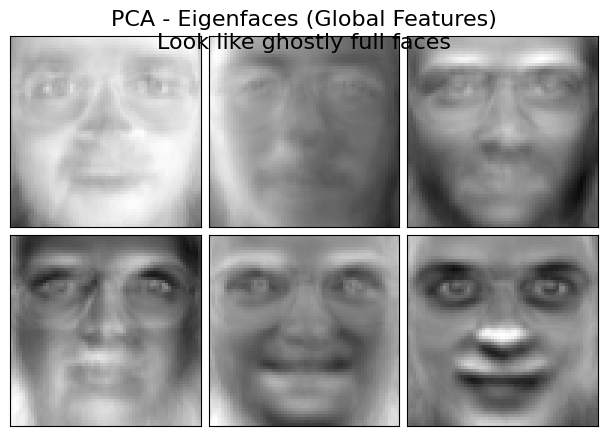

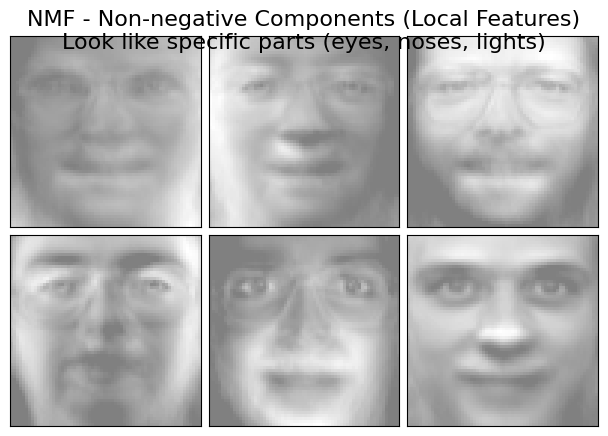

In [ ]:
import logging
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState

from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces

# 設定顯示參數
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# 1. 載入數據 (Olivetti Faces)
# 這是一個包含 400 張人臉的數據集，每張圖是 64x64 像素
print("正在載入臉部數據集...")
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

# 顯示數據的基本資訊
n_samples, n_features = faces.shape
print(f"數據集包含 {n_samples} 張圖片，每張圖片有 {n_features} 個像素特徵。")
print(f"數據範圍: {faces.min()} ~ {faces.max()}") # 確認是非負的 (0~1)

# 定義一個繪圖函數來顯示特徵 (Basis Images)
def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())

        # 繪製圖像，並重塑回 64x64
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# ---------------------------------------------------------
# 2. 執行 PCA (作為對照組)
# PCA 的特徵 (Eigenfaces) 包含正負值，無非負限制
print("\n正在執行 PCA (Eigenfaces)...")
pca = decomposition.PCA(n_components=n_components, whiten=True, svd_solver='randomized', random_state=0)
pca.fit(faces)

# ---------------------------------------------------------
# 3. 執行 NMF (本角)
# init='nndsvda' 是一種適合稀疏數據的初始化方法
print("正在執行 NMF...")
nmf = decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3, random_state=0)
nmf.fit(faces)

# ---------------------------------------------------------
# 4. 視覺化與比較結果

# 繪製 PCA 提取出的特徵
plot_gallery("PCA - Eigenfaces (Global Features)\nLook like ghostly full faces",
             pca.components_[:n_components])

# 繪製 NMF 提取出的特徵
plot_gallery("NMF - Non-negative Components (Local Features)\nLook like specific parts (eyes, noses, lights)",
             nmf.components_[:n_components])

plt.show()

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-11-21 06:47:25--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.137.113, 74.125.137.138, 74.125.137.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-11-21 06:47:25--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  40.7MB/s    in 0.5s    

2025-11-21 06:4

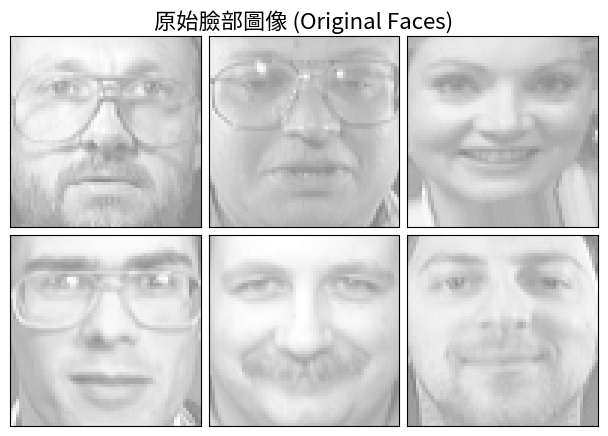

In [ ]:
plot_gallery("原始臉部圖像 (Original Faces)", faces[:n_components])
plt.show()